Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [42]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

In [6]:
column_names=["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type_of_glass"]
df=pd.read_csv("C:\\Users\\Sundar\\Downloads\\glass.data", header=None, names=column_names)
df.head(3)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [7]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.dtypes

ID                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

ID                0
RI               17
Na                7
Mg                0
Al               18
Si               12
K                 7
Ca               26
Ba               38
Fe               12
Type_of_glass    29
dtype: int64

In [10]:
temp = pd.DataFrame([[col,len(df[col].unique())] for col in df.columns])
temp.columns = ['Feature', 'Unique']
temp

,Feature,Unique
0,ID,214
1,RI,178
2,Na,142
3,Mg,94
4,Al,118
5,Si,133
6,K,65
7,Ca,143
8,Ba,34
9,Fe,32


In [11]:
df.drop(columns = ["ID"], axis=1, inplace= True)#dropping col with all 214 unique values
df.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


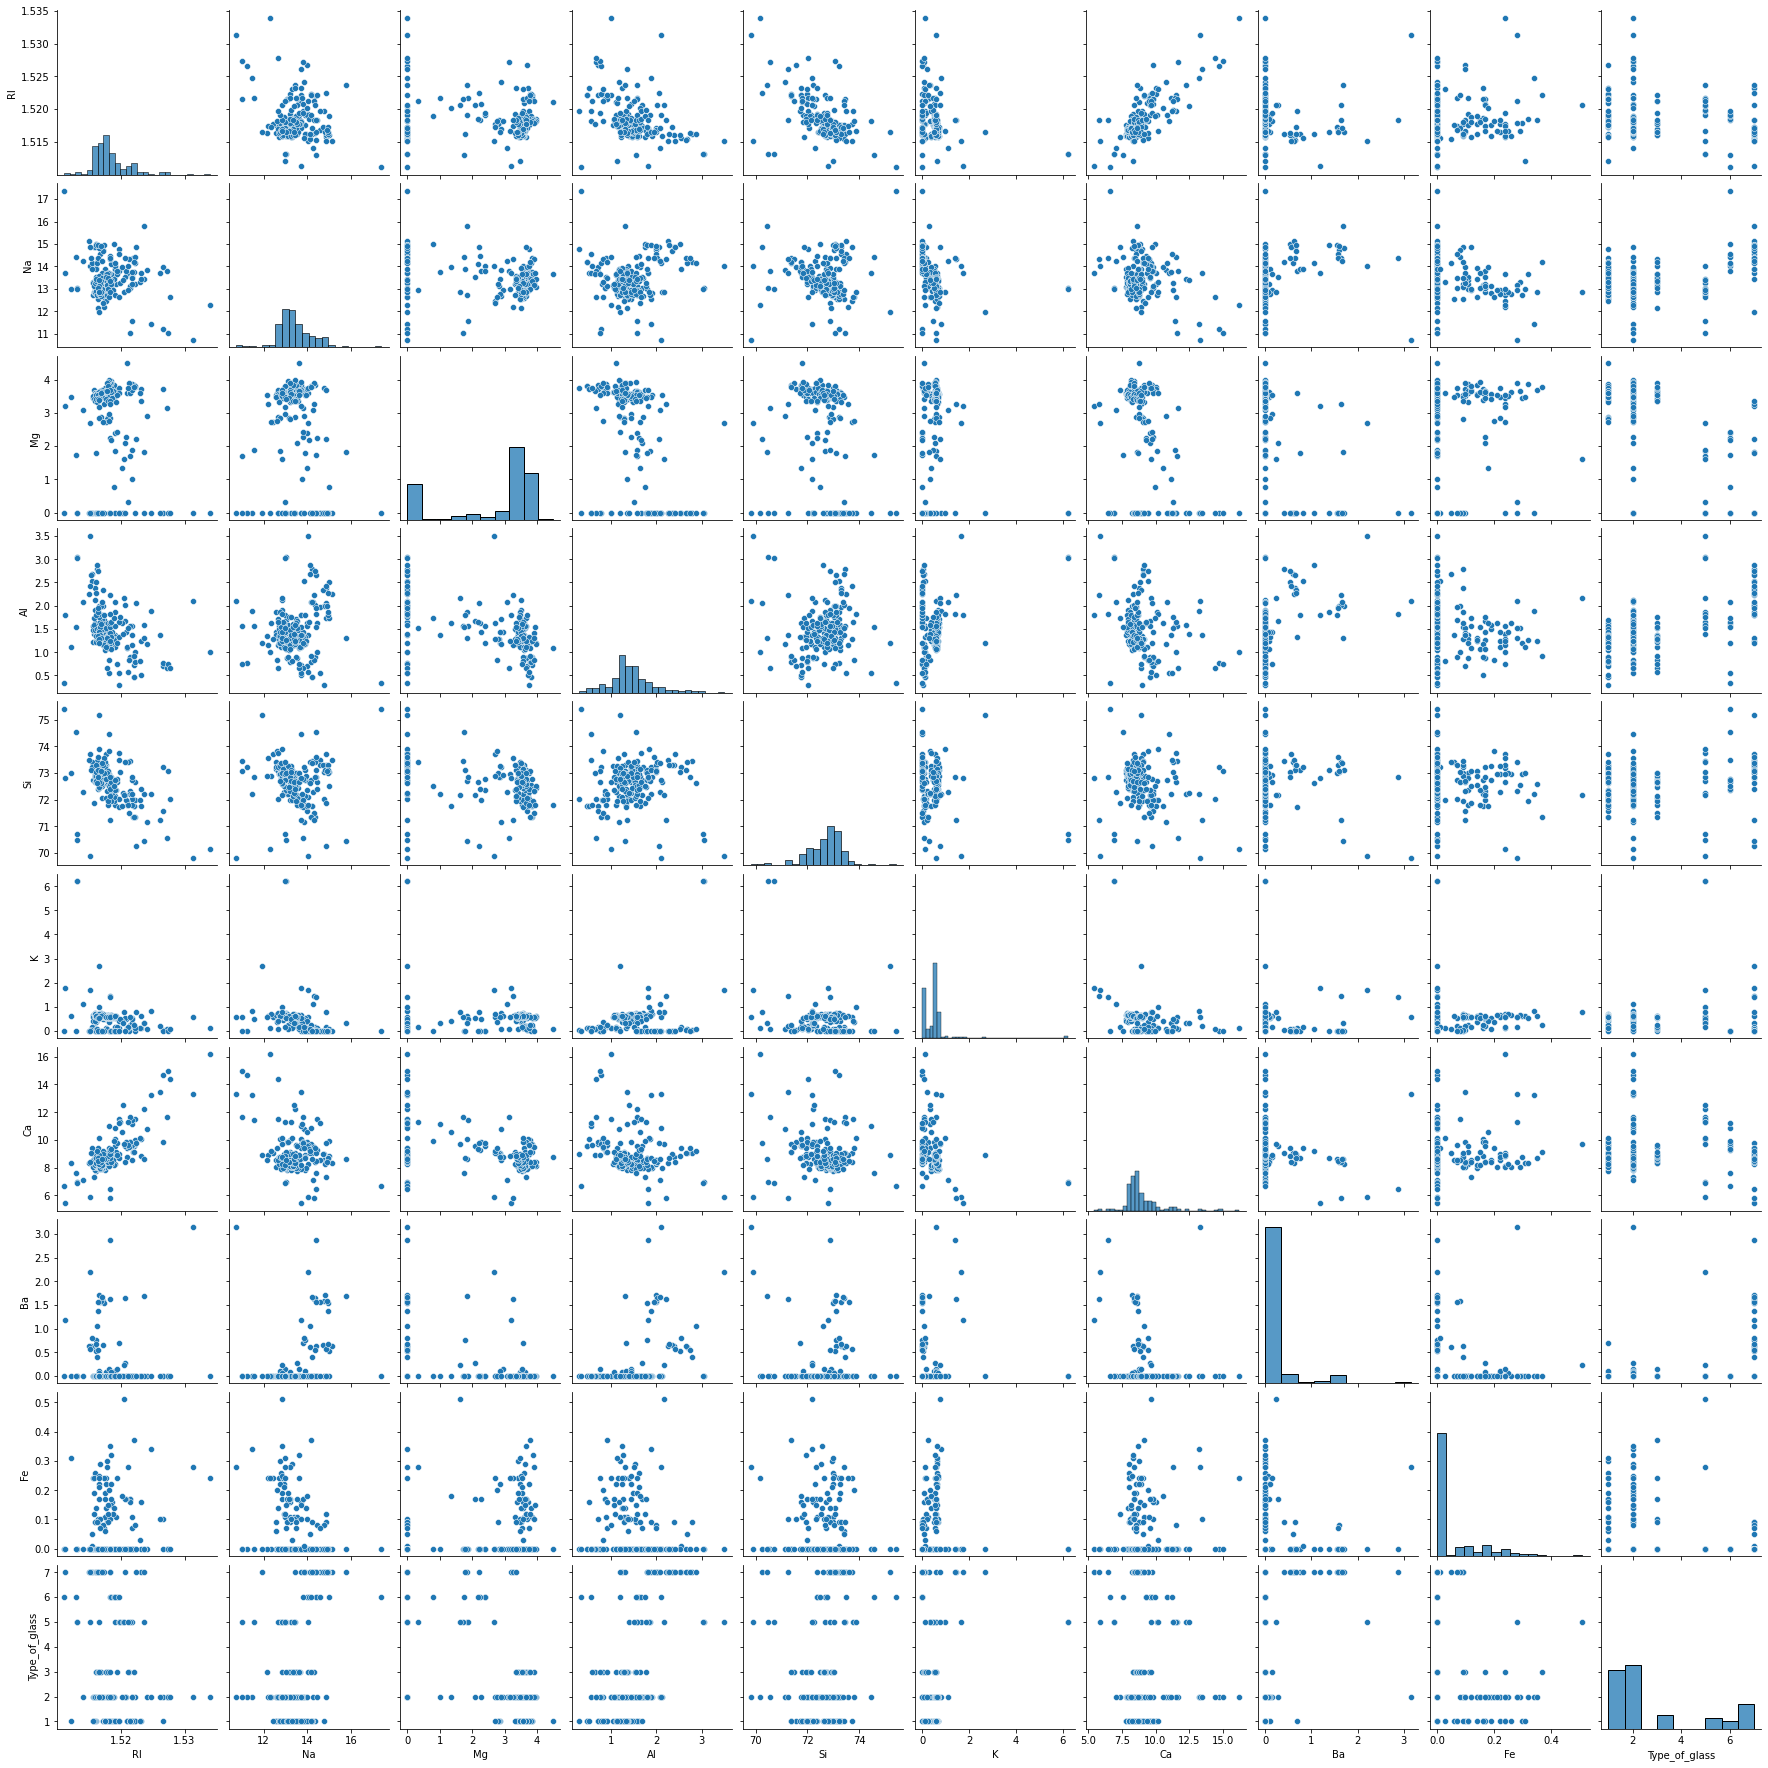

In [40]:
sns.pairplot(df)
#look for last row (all features Vs Type of glass)

the last row plots shows all features vs Types_of_glass
we cannot come upto a conclusion just by looking at this images.
The varying combnations of the oxide content results in 1 of the 6 classes of glasses.

#link for KNN distance metric
https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

In [12]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'], dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
x=df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
y=df['Type_of_glass'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train.shape

(171, 9)

In [16]:
for i in range(1,21):
  knn = KNeighborsClassifier(metric= 'manhattan',n_neighbors=i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model



C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


K value  :  1  train score :  1.0  score :  0.7026143790849673
K value  :  2  train score :  0.8421052631578947  score :  0.6967320261437908
K value  :  3  train score :  0.8596491228070176  score :  0.6905228758169935
K value  :  4  train score :  0.7894736842105263  score :  0.6852941176470588
K value  :  5  train score :  0.7660818713450293  score :  0.673202614379085
K value  :  6  train score :  0.7660818713450293  score :  0.6735294117647059


C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


K value  :  7  train score :  0.7543859649122807  score :  0.661764705882353
K value  :  8  train score :  0.7309941520467836  score :  0.6676470588235295
K value  :  9  train score :  0.7309941520467836  score :  0.7019607843137254
K value  :  10  train score :  0.7251461988304093  score :  0.6852941176470588
K value  :  11  train score :  0.7426900584795322  score :  0.6911764705882353
K value  :  12  train score :  

C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.7426900584795322  score :  0.661764705882353
K value  :  13  train score :  0.7134502923976608  score :  0.6735294117647059
K value  :  14  train score :  0.7134502923976608  score :  0.6614379084967321
K value  :  15  train score :  0.7076023391812866  score :  0.650326797385621
K value  :  16  train score :  0.7192982456140351  score :  0.661764705882353


C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


K value  :  17  train score :  0.7192982456140351  score :  0.6562091503267974
K value  :  18  train score :  0.7076023391812866  score :  0.638562091503268
K value  :  19  train score :  0.6900584795321637  score :  0.6444444444444445
K value  :  20  train score :  0.7017543859649122  score :  0.650326797385621


C:\Users\Sundar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


k=1 is the best value with  cross val score :  0.7607843137254903

# Comparison of Classification report(Manhattan/Euclidean metrics)

In [26]:
from sklearn.metrics import classification_report

In [17]:
knn = KNeighborsClassifier(metric= 'manhattan',n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7674418604651163

In [24]:
y_pred=knn.predict(x_test)
target_names = ['class 1', 'class 2', 'class 3','class 4', 'class 5', 'class 6']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.93      0.78      0.85        18
     class 2       0.73      0.79      0.76        14
     class 3       0.25      0.25      0.25         4
     class 4       0.67      1.00      0.80         2
     class 5       0.75      1.00      0.86         3
     class 6       1.00      1.00      1.00         2

    accuracy                           0.77        43
   macro avg       0.72      0.80      0.75        43
weighted avg       0.78      0.77      0.77        43



In [22]:
knn2 = KNeighborsClassifier(metric= 'euclidean',n_neighbors=1)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.7209302325581395

In [25]:
y_pred=knn2.predict(x_test)
target_names = ['class 1', 'class 2', 'class 3','class 4', 'class 5', 'class 6']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.86      0.67      0.75        18
     class 2       0.67      0.86      0.75        14
     class 3       0.25      0.25      0.25         4
     class 4       0.50      0.50      0.50         2
     class 5       1.00      1.00      1.00         3
     class 6       1.00      1.00      1.00         2

    accuracy                           0.72        43
   macro avg       0.71      0.71      0.71        43
weighted avg       0.74      0.72      0.72        43



## manhattan distance works good for this data set. the accuracy is higher while using manhattan distance rather than euclidean.